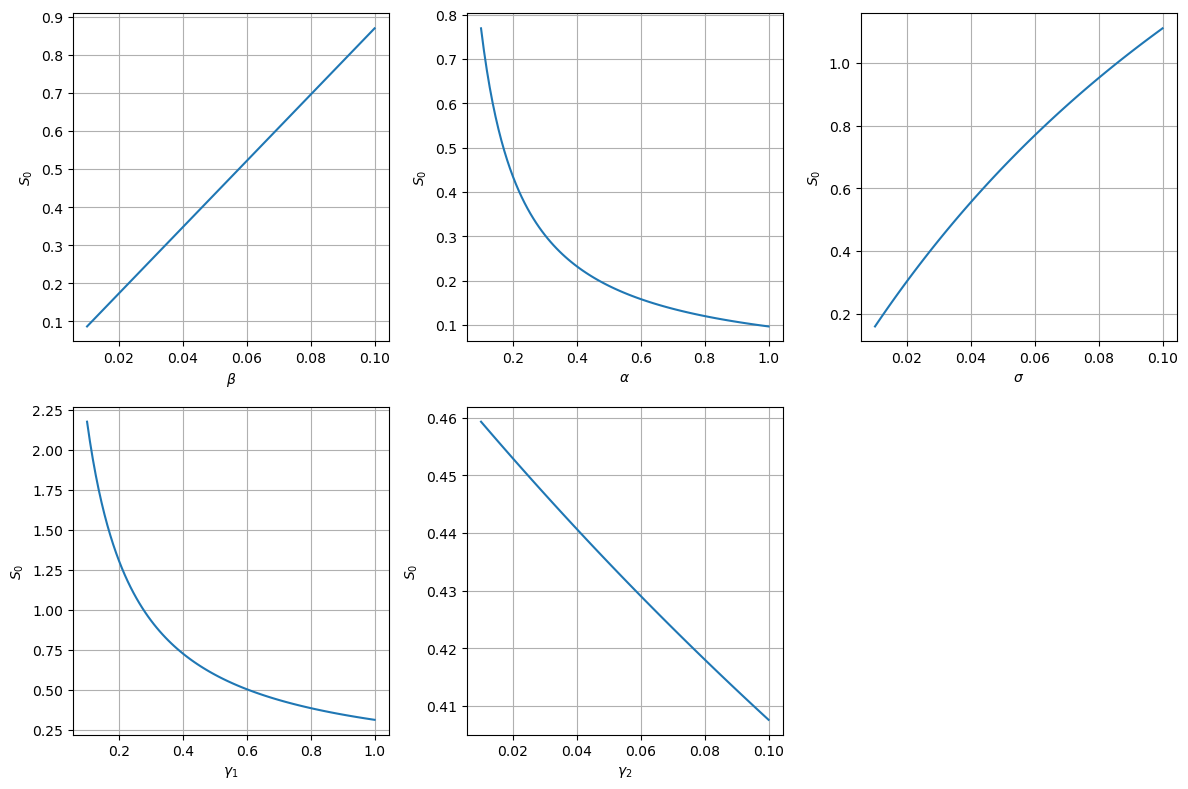

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the formula for R0
def calculate_R0(beta, alpha, sigma, gamma1, gamma2, N):
    return (beta * sigma * N) / ((alpha + sigma) * (gamma1 + gamma2))

# Define parameter ranges
beta_values = np.linspace(0.01, 0.1, 100)  # Range of beta values
alpha_values = np.linspace(0.1, 1.0, 100)   # Range of alpha values
sigma_values = np.linspace(0.01, 0.1, 100)  # Range of sigma values
gamma1_values = np.linspace(0.1, 1.0, 100)  # Range of gamma1 values
gamma2_values = np.linspace(0.01, 0.1, 100)  # Range of gamma2 values

# Fixed values
N = 50  # Fixed population size

# Calculate R0 for different parameter values
R0_beta = calculate_R0(beta_values, 0.2, 0.03, 0.7, 0.05, N)
R0_alpha = calculate_R0(0.05, alpha_values, 0.03, 0.7, 0.05, N)
R0_sigma = calculate_R0(0.05, 0.2, sigma_values, 0.7, 0.05, N)
R0_gamma1 = calculate_R0(0.05, 0.2, 0.03, gamma1_values, 0.05, N)
R0_gamma2 = calculate_R0(0.05, 0.2, 0.03, 0.7, gamma2_values, N)

# Plot R0 vs. each parameter
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(beta_values, R0_beta, label='R0 vs. Beta')
plt.xlabel(r'$\beta$')
plt.ylabel('$S_0$')
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(alpha_values, R0_alpha, label='R0 vs. Alpha')
plt.xlabel(r'$\alpha$')
plt.ylabel('$S_0$')
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(sigma_values, R0_sigma, label='R0 vs. Sigma')
plt.xlabel(r'$\sigma$')
plt.ylabel('$S_0$')
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(gamma1_values, R0_gamma1, label='R0 vs. Gamma1')
plt.xlabel(r'$\gamma_1$')
plt.ylabel('$S_0$')
plt.grid(True)

plt.subplot(2, 3, 5)
plt.plot(gamma2_values, R0_gamma2, label='R0 vs. Gamma2')
plt.xlabel(r'$\gamma_2$')
plt.ylabel('$S_0$')
plt.grid(True)

plt.tight_layout()
plt.show()

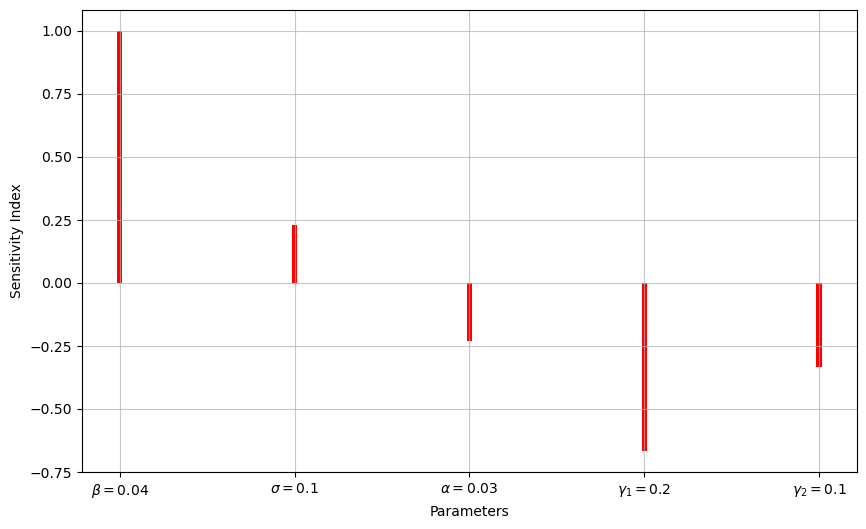

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the constants
beta = 0.04
sigma = 0.1
alpha = 0.03
gamma1 = 0.2
gamma2 = 0.1
N = 100

# Define the expression for R0
R0 = (beta * sigma * N) / ((alpha + sigma) * (gamma1 + gamma2))

# Create symbolic variables
beta_sym = sp.symbols(r'\beta=0.04')  # LaTeX formatting
sigma_sym = sp.symbols(r'\sigma=0.1') 
alpha_sym = sp.symbols(r'\alpha=0.03') 
gamma1_sym = sp.symbols(r'\gamma_1=0.2') 
gamma2_sym = sp.symbols(r'\gamma_2=0.1')  


# Create the symbolic functions for R0
func_beta = (beta_sym * sigma * N) / ((alpha + sigma) * (gamma1 + gamma2))
func_sigma = (beta * sigma_sym * N) / ((alpha + sigma_sym) * (gamma1 + gamma2))
func_alpha = (beta * sigma * N) / ((alpha_sym + sigma) * (gamma1 + gamma2))
func_gamma1 = (beta * sigma * N) / ((alpha + sigma) * (gamma1_sym + gamma2))
func_gamma2 = (beta * sigma * N) / ((alpha + sigma) * (gamma1 + gamma2_sym))

# Calculate the derivatives of R0 with respect to parameters
dR0_dbeta = sp.diff(func_beta, beta_sym)
dR0_dsigma = sp.diff(func_sigma, sigma_sym)
dR0_dalpha = sp.diff(func_alpha, alpha_sym)
dR0_dgamma1 = sp.diff(func_gamma1, gamma1_sym)
dR0_dgamma2 = sp.diff(func_gamma2, gamma2_sym)

# Evaluate the derivatives at the given values of parameters
val_beta = dR0_dbeta.evalf(subs={beta_sym: beta})
val_sigma = dR0_dsigma.evalf(subs={sigma_sym: sigma})
val_alpha = dR0_dalpha.evalf(subs={alpha_sym: alpha})
val_gamma1 = dR0_dgamma1.evalf(subs={gamma1_sym: gamma1})
val_gamma2 = dR0_dgamma2.evalf(subs={gamma2_sym: gamma2})

# Calculate the sensitivity indices
i_beta = (beta / R0) * val_beta
i_sigma = (sigma / R0) * val_sigma
i_alpha = (alpha / R0) * val_alpha
i_gamma1 = (gamma1 / R0) * val_gamma1
i_gamma2 = (gamma2 / R0) * val_gamma2

# Create a list of parameter names and corresponding sensitivity indices
parameters = [r'$\beta=0.04$', r'$\sigma=0.1$', r'$\alpha=0.03$', r'$\gamma_1=0.2$', r'$\gamma_2=0.1$']  
sensitivity_indices = [i_beta, i_sigma, i_alpha, i_gamma1, i_gamma2]
# Create a bar plot for sensitivity indices
plt.figure(figsize=(10, 6))
plt.bar(parameters, sensitivity_indices, color='r', width=0.03)
plt.xlabel("Parameters")
plt.ylabel("Sensitivity Index")
#plt.title("Sensitivity Indices for $R_0$")
plt.grid(True, linestyle='-', alpha=0.7)
plt.show()
